In [1]:
#importing Necessary  libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data.   
2.After loading it is important to check null values in a column or a row           
3.If it is present then following can be done,                                                                                   
*       Filling NaN values with mean, median and mode using fillna() method                                                           
*       If Less missing values, we can drop it as well    

In [2]:
#importing dataset
df = pd.read_excel(r"C:\Users\ompra\OneDrive\Desktop\ML_PROJECT\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.shape   #show total rows and columns of dataframe

(10683, 11)

## EDA & DATA VISUALIZATION

In [6]:
df.isnull().sum()   #to check null values in dataframe

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#drop the nullvalues
df.dropna(inplace=True)         #i observe 2 missing values,I can directly drop these,as these are very less.

In [8]:
df.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dtypes # show datatypes of each column  

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<AxesSubplot:xlabel='Price'>

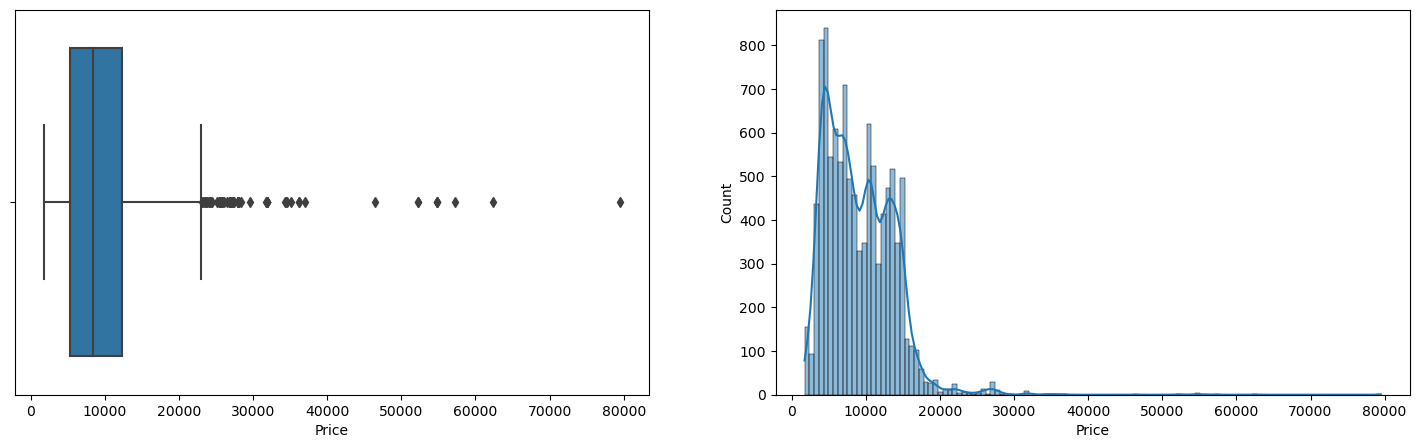

In [10]:
#histplot & Boxplot
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'Price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'Price', data = df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


Text(0.5, 1.0, 'Airline prices based on total stop')

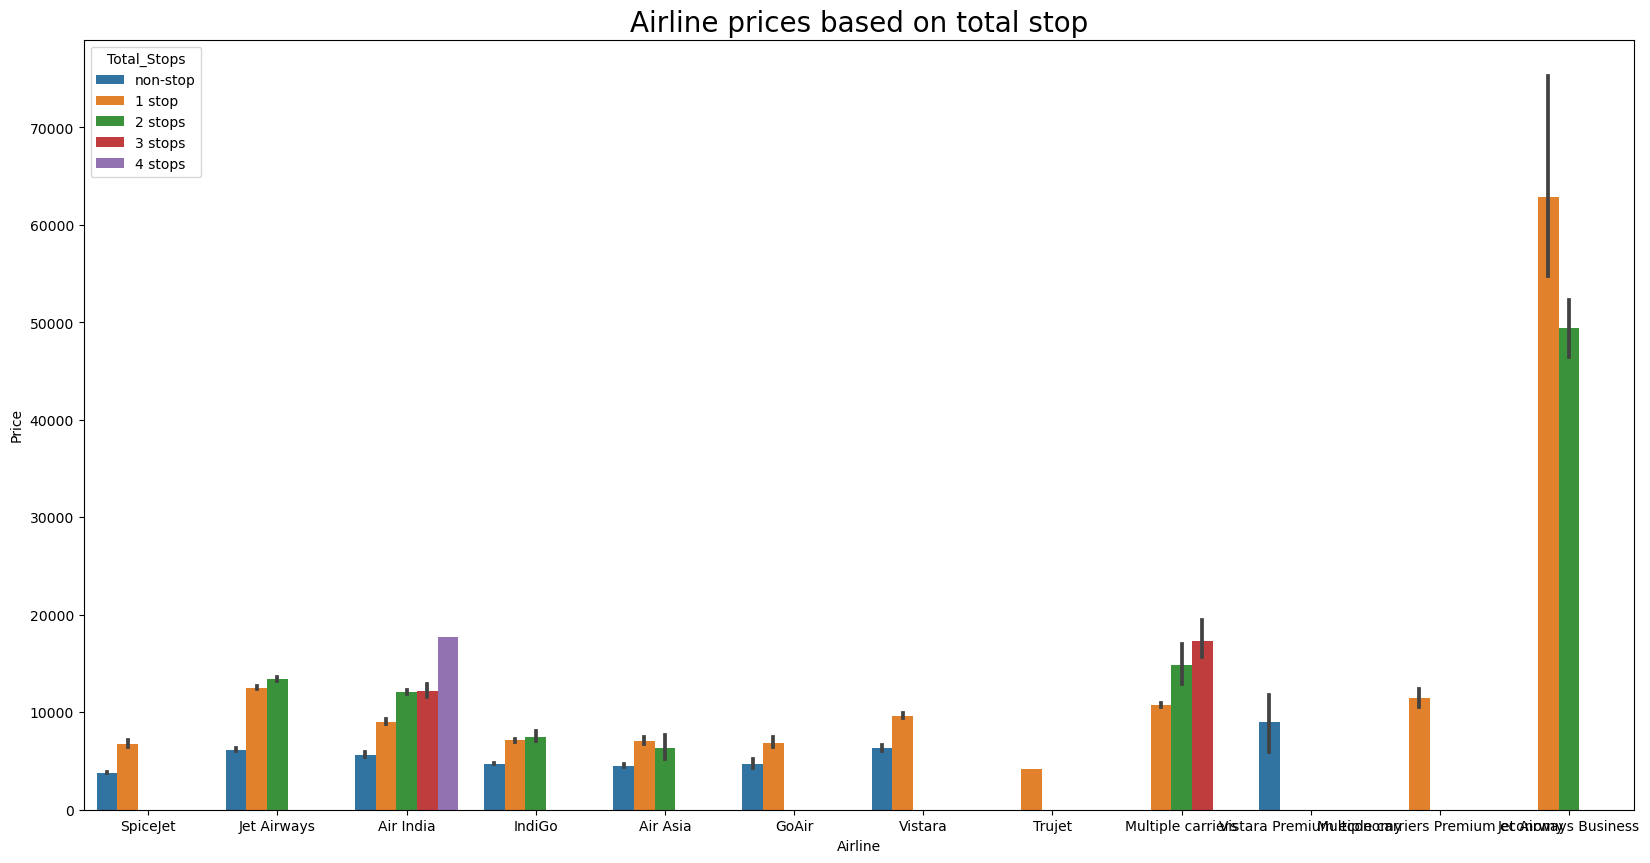

In [12]:
#barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Airline',y='Price',hue="Total_Stops",data=df.sort_values("Price")).set_title('Airline prices based on total stop',fontsize=20)

Text(0.5, 1.0, 'price depending on the days destination')

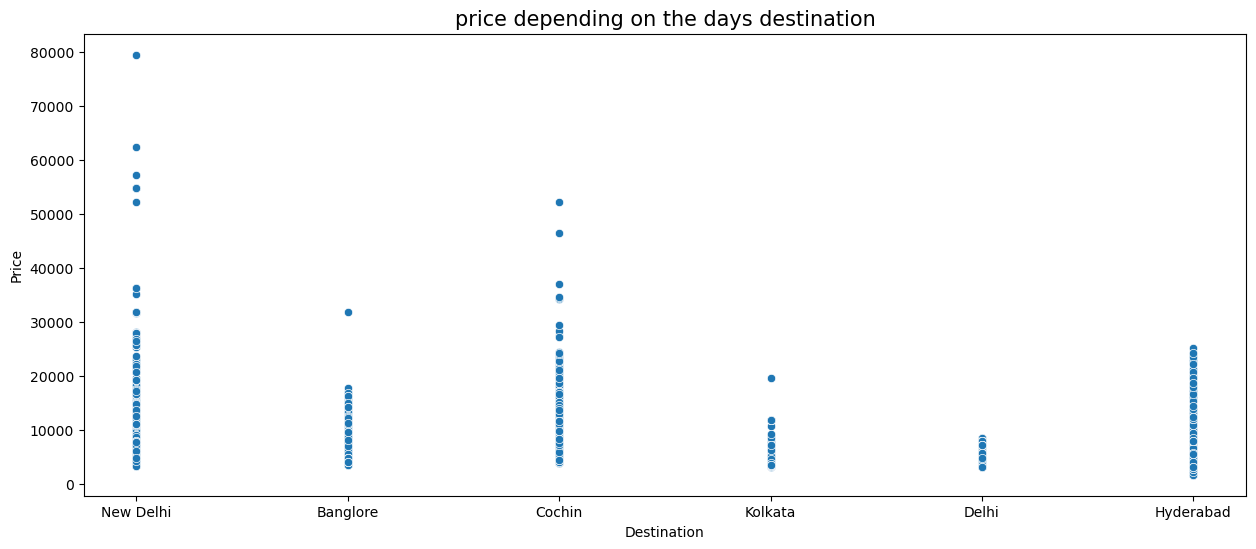

In [13]:
#scatter plot
plt.figure(figsize=(15,6))
sns.scatterplot(x="Destination", y="Price", data=df).set_title("price depending on the days destination",fontsize=15)

<AxesSubplot:ylabel='None'>

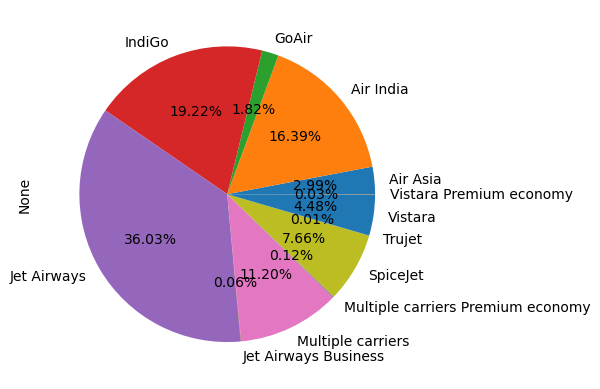

In [14]:
#pie plot
df.groupby("Airline").size().plot(kind="pie",autopct="%1.2f%%")

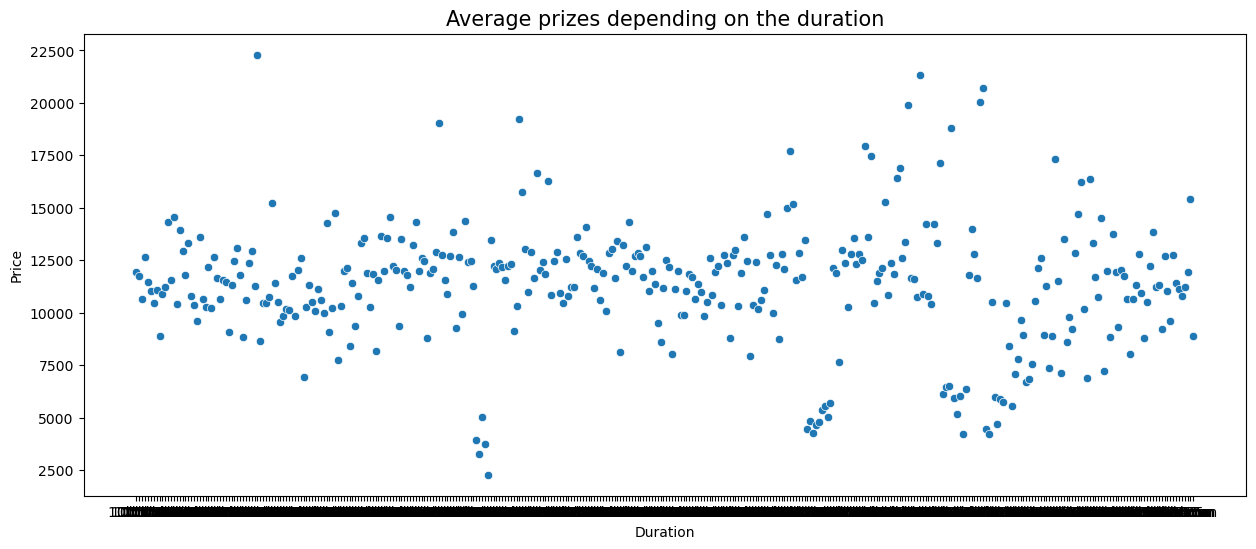

In [15]:
#scattter plot
df_temp = df.groupby(['Duration'])['Price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

In [16]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.
So,firstly we convert it into date and time for proper prediction.
dt.day method will extract only day of that date
dt.month method will extract only month of that date

In [17]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day               #extracted day from date of journey column
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month        #extracted month from date of journey column   

In [18]:
#show top five rows of dataframe
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
# now i have converted Date_of_Journey column into integers, so i dropped as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
# Similar to Date_of_Journey i can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now i can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
# Similar to Date_of_Journey i can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now i can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
# Similar to Date_of_Journey we can extract values from Duration
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
print(duration_hours)

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3, 27, 7,

In [25]:
print(duration_mins)

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50, 15, 35, 15, 10, 35, 35, 30, 35, 0, 35, 10, 20, 50, 55, 20, 10, 45, 55, 50, 15, 15, 25, 50, 0, 30, 25, 15, 30, 15, 55, 5, 30, 5, 45, 0, 50, 50, 15, 5, 55, 15, 20, 50, 0, 50, 15, 5, 15, 30, 5, 25, 20, 15, 30, 15, 25, 50, 30, 20, 15, 25, 30, 20, 30, 0, 45, 50, 30, 5, 15, 50, 40, 10, 35, 0, 20, 25, 45, 20, 0, 15, 5, 30, 20, 35, 25, 40, 0, 25, 35, 20, 15, 30, 0, 45, 55, 10, 30, 20, 55, 0, 55, 45, 10, 55, 25, 5, 10, 40, 55, 40, 25, 5, 15, 25, 10, 10, 0, 50, 20, 0, 55, 10, 45, 0, 50, 40, 15, 45, 50, 0, 15, 25, 35, 50, 35, 25, 55, 50, 10, 20, 25, 50, 20, 15, 35, 35, 50, 45, 10, 50, 45, 15, 20, 30, 25, 30, 40, 10, 45, 35, 5, 30, 30, 10, 35, 5, 50, 0, 0, 25, 30, 30, 0, 20, 30, 45, 10, 35, 45, 55, 35, 20, 5, 40, 15, 10, 25, 50, 25, 15, 50, 15, 50, 20, 55, 35, 35, 30, 20, 55, 15, 5, 45, 55, 30, 40, 45, 55, 0, 45, 15, 25, 15, 55, 50, 25, 50, 30, 30, 40, 35, 15, 30, 45, 35, 30, 55, 55, 15, 40, 30, 0, 15, 15, 50, 10, 25, 20, 30, 10, 30, 20, 35, 15, 20, 45, 0, 0,

In [26]:
# Adding duration_hours and duration_mins list to  dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
df.drop(["Duration"], axis = 1, inplace = True)   ## Now i can drop Duration Column as it is of no use

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
# so i dropped both columns

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [33]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
# As this is case of Ordinal Categorical type ,so  perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> Ordinal Encoder is used in this case
Ordinal data --> data are in order --> LabelEncoder is used in this case

In [35]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [36]:
numcol=df.select_dtypes(["int64"]).columns
numcol

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [37]:
catcol=df.select_dtypes(["object"]).columns
catcol

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [38]:
#Handling Categorical Data with OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Airline', 'Source', 'Destination']]=oe.fit_transform(df[['Airline', 'Source', 'Destination']])

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45


## Check For Outliers 

In [40]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,2.352090,1.177276,1.474845,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:>

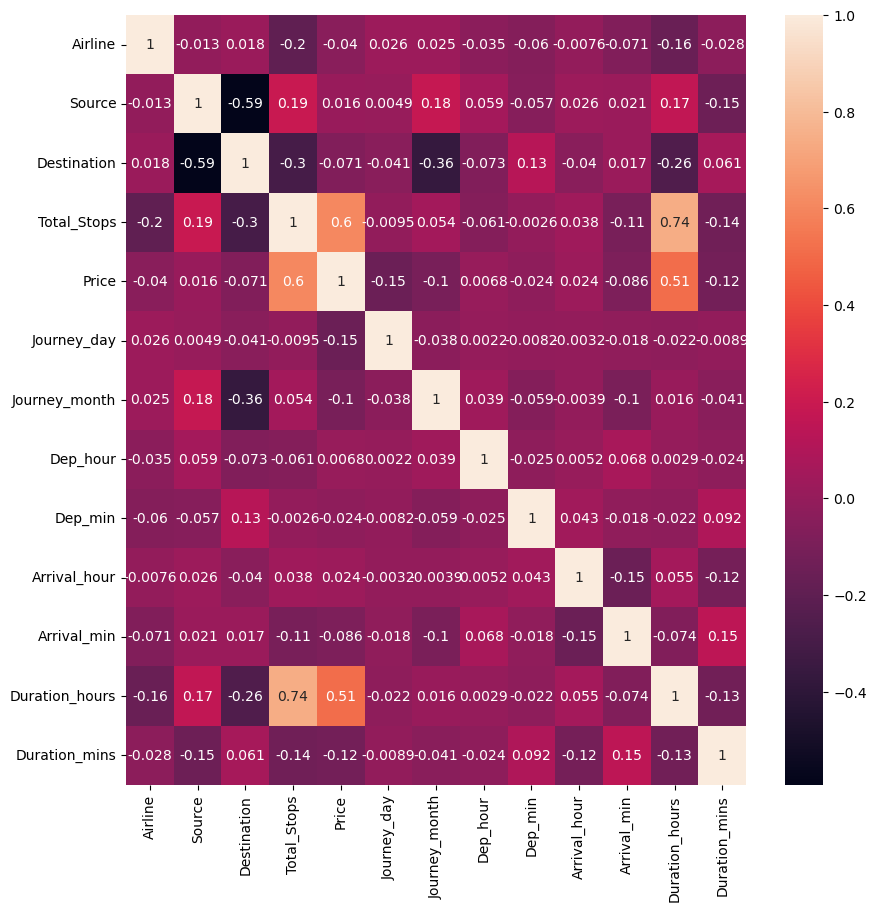

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [42]:
df.skew()

Airline           0.731057
Source           -0.424023
Destination       1.244046
Total_Stops       0.317109
Price             1.812405
Journey_day       0.118174
Journey_month    -0.387409
Dep_hour          0.112924
Dep_min           0.167234
Arrival_hour     -0.370146
Arrival_min       0.110945
Duration_hours    0.851197
Duration_mins    -0.090680
dtype: float64

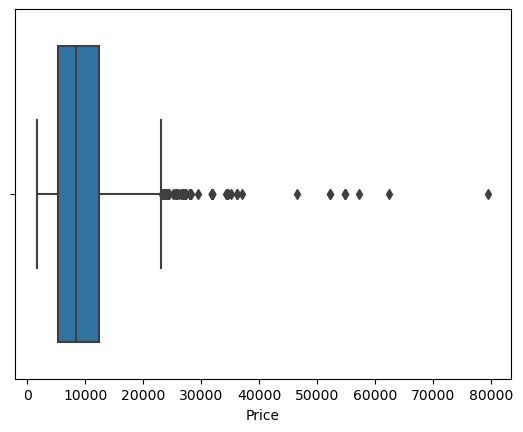

In [43]:

sns.boxplot(df['Price'])
plt.show()

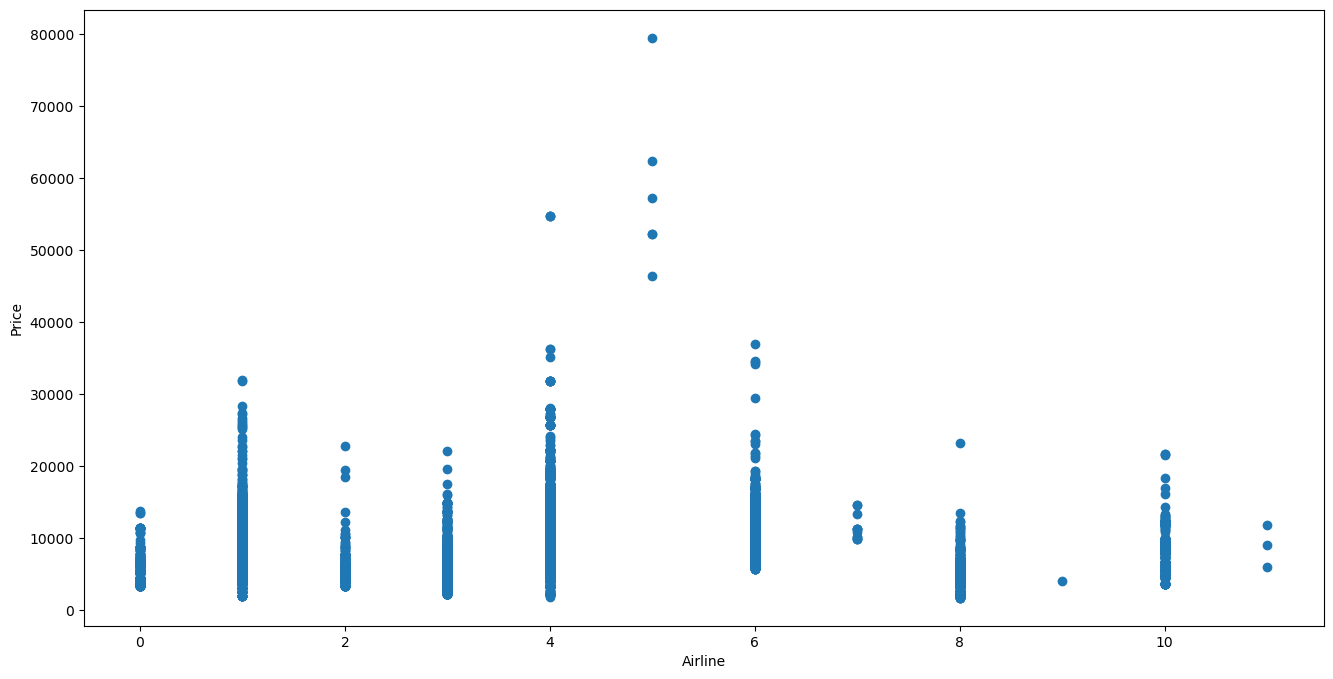

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Airline'], df['Price'])
ax.set_xlabel('Airline')
ax.set_ylabel('Price')
plt.show()

## HANDLING OULIERS WITH Z SCORE

In [45]:
#to remove outliers from dataset i uesd zscore
from scipy.stats import zscore
features=df[["Price"]]
z=np.abs(zscore(features))
z.head()

,Price
0,1.125535
1,0.309068
2,1.039783
3,0.622209
4,0.914006


In [46]:
# Removing outliers using z-score

newdf=df[(z<=3).all(axis=1)] 
newdf

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,0,4107,9,4,19,55,22,25,2,30
10679,1.0,3.0,0.0,0,4145,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,0,7229,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,0,12648,1,3,11,30,14,10,2,40


In [47]:
df.shape

(10682, 13)

In [48]:
newdf.shape

(10586, 13)

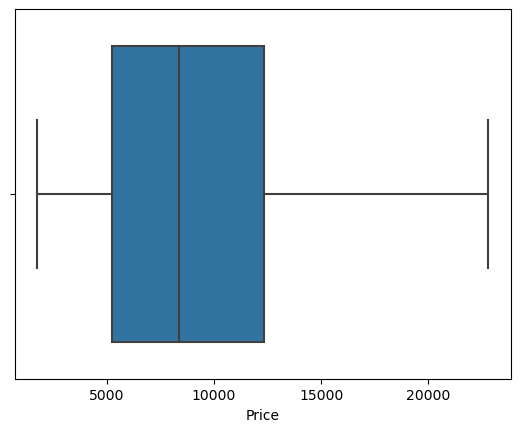

In [49]:

sns.boxplot(newdf['Price'])
plt.show()

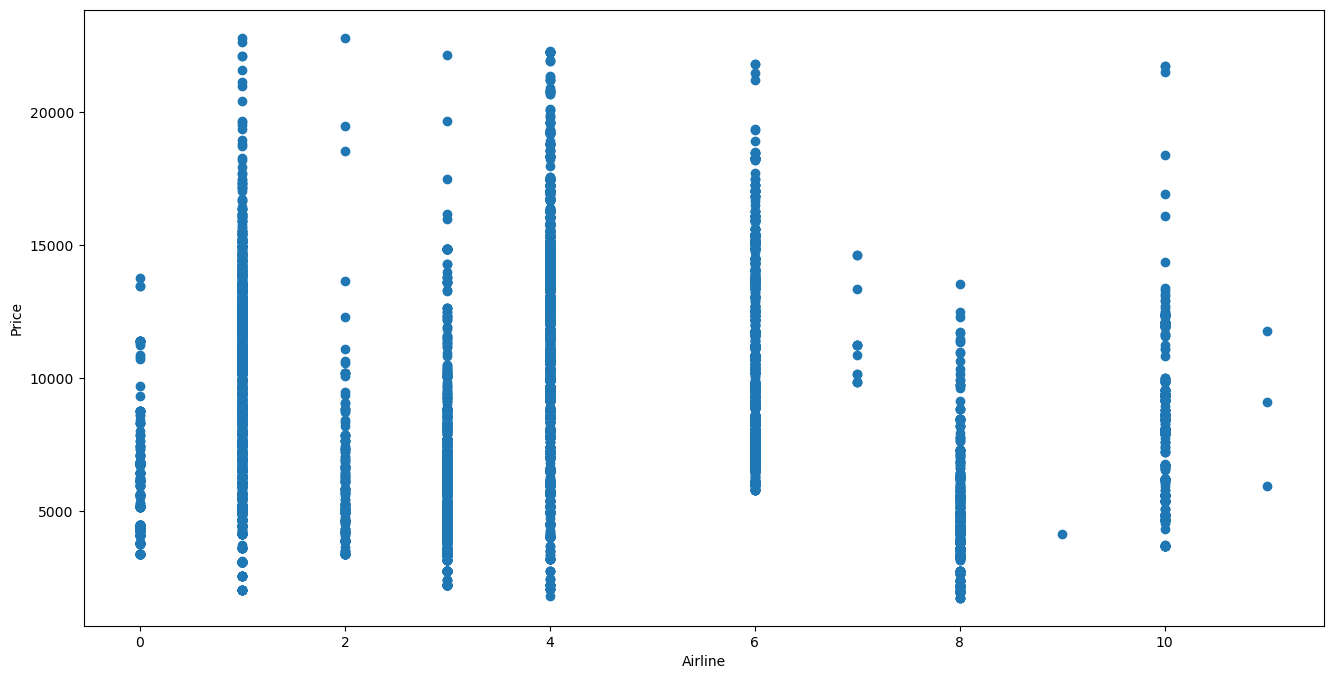

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(newdf['Airline'], newdf['Price'])
ax.set_xlabel('Airline')
ax.set_ylabel('Price')
plt.show()

In [51]:
newdf.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45


In [52]:
newdf.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45


## Feature Selection

In [53]:
x=newdf.drop('Price',axis=1)
y=newdf['Price']

In [54]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10586, dtype: int64

## After all preprocessing, Our data is ready for the modeling

In [55]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [58]:
#importing necessary libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
#from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [59]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    r2score=r2_score(ytest,ypred)
    
    print(f"Training score:{train}\nTesting score:{test}")
    print("r2 score is:{}".format(r2score))
  
    
    return model

In [60]:
lr=mymodel(LinearRegression())

Training score:0.5021568900400523
Testing score:0.49695779282083297
r2 score is:0.49695779282083297


In [61]:
ab=mymodel(AdaBoostRegressor())

Training score:0.6493047654078969
Testing score:0.63661950168895
r2 score is:0.63661950168895


In [62]:
kr=mymodel(KNeighborsRegressor())

Training score:0.7791333677321824
Testing score:0.6379535499398377
r2 score is:0.6379535499398377


In [63]:
dt=mymodel(DecisionTreeRegressor(max_depth=8))

Training score:0.8196489405809568
Testing score:0.7882150412319084
r2 score is:0.7882150412319084


In [64]:
gr=mymodel(GradientBoostingRegressor(max_depth=4))

Training score:0.8286118965680856
Testing score:0.8076569424835682
r2 score is:0.8076569424835682


In [ ]:
#xg=mymodel(XGBRegressor())

Training score:0.9277899269437797
Testing score:0.8463542774301371
r2 score is:0.8463542774301371


In [65]:
rt=mymodel(RandomForestRegressor())

Training score:0.9525773358496276
Testing score:0.8152828657748526
r2 score is:0.8152828657748526


In [66]:
#hyperparameter tunning
#max_depth
#min_samples_leaf
for i in range(1,10):
    dt1=RandomForestRegressor(max_depth=i)
    dt1.fit(xtrain,ytrain)
    train=dt1.score(xtrain,ytrain)
    test=dt1.score(xtest,ytest)

    print(f"{i} {train}  {test}")

1 0.4758608382574633  0.47969065857265814
2 0.5366233486924082  0.5364158563516013
3 0.6192904372109997  0.6187763867566657
4 0.6554123408802767  0.6543916056947054
5 0.7141369677546466  0.706836727186265
6 0.7678258084804661  0.7572696648731968
7 0.8075134984251251  0.7919863255425169
8 0.8426737452614783  0.8159801349637225
9 0.8689665025573494  0.831180395104854


In [67]:
for i in range(11,18):
    dt2=RandomForestRegressor(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    train=dt2.score(xtrain,ytrain)
    test=dt2.score(xtest,ytest)

    print(f"{i} {train}  {test}")

11 0.8555047185877976  0.8203187725759782
12 0.8502949157501869  0.8177006612865462
13 0.8453929907559609  0.8150170617968375
14 0.8397281492796624  0.8121061502397289
15 0.8341517749790264  0.8077748014462575
16 0.8298204175003862  0.8025525827138409
17 0.8238966055286803  0.7983801661517369


In [68]:
rt1=mymodel(RandomForestRegressor(max_depth=13,min_samples_leaf=14))

Training score:0.8397035898809956
Testing score:0.8123538469206868
r2 score is:0.8123538469206868


In [79]:
#saving our model
import pickle
#file = open('flight_model.pkl', 'wb')
pickle.dump(rt1,open('flight_model.pkl', 'wb'))

In [70]:
newdf

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,0,4107,9,4,19,55,22,25,2,30
10679,1.0,3.0,0.0,0,4145,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,0,7229,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,0,12648,1,3,11,30,14,10,2,40


In [72]:
newdf.nunique()

Airline             11
Source               5
Destination          6
Total_Stops          5
Price             1824
Journey_day         10
Journey_month        4
Dep_hour            24
Dep_min             12
Arrival_hour        24
Arrival_min         12
Duration_hours      44
Duration_mins       12
dtype: int64

In [73]:
catcol

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [77]:
numcol

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [80]:
newdf

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,0,4107,9,4,19,55,22,25,2,30
10679,1.0,3.0,0.0,0,4145,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,0,7229,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,0,12648,1,3,11,30,14,10,2,40
